In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


In [2]:
df=pd.read_csv('../Datasets/ejemplo2.csv')
df['Edad_cuadrado'] = df['Edad'] ** 2
X = df[['Edad', 'Edad_cuadrado']]
Y = df['Ingreso']
m = Y.shape[0]
X_copia=X.copy()

In [3]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [4]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print(X_norm)


        Edad  Edad_cuadrado
0  -1.612452      -1.150200
1  -1.364382      -1.101940
2  -1.116313      -1.021506
3  -0.868243      -0.908899
4  -0.620174      -0.764119
5  -0.372104      -0.587165
6  -0.124035      -0.378038
7   0.124035      -0.136737
8   0.372104       0.136737
9   0.620174       0.442385
10  0.868243       0.780206
11  1.116313       1.150200
12  1.364382       1.552368
13  1.612452       1.986709


In [5]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)


[[ 1.         -1.61245155 -1.15020019]
 [ 1.         -1.36438208 -1.10194004]
 [ 1.         -1.11631261 -1.02150646]
 [ 1.         -0.86824314 -0.90889945]
 [ 1.         -0.62017367 -0.76411901]
 [ 1.         -0.3721042  -0.58716513]
 [ 1.         -0.12403473 -0.37803782]
 [ 1.          0.12403473 -0.13673709]
 [ 1.          0.3721042   0.13673709]
 [ 1.          0.62017367  0.44238469]
 [ 1.          0.86824314  0.78020572]
 [ 1.          1.11631261  1.15020019]
 [ 1.          1.36438208  1.55236809]
 [ 1.          1.61245155  1.98670941]]


In [6]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


theta calculado por el descenso por el gradiente: [ 3647.85702694  3761.18465568 -2299.19257872]
edad de 50 sueldo aproximado: $3598


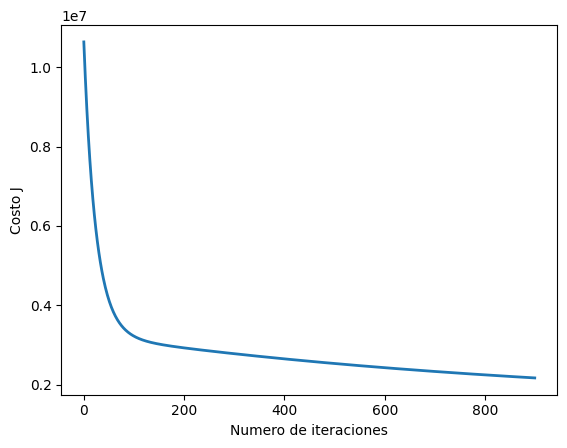

In [8]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.019  # alpha = 0.003
num_iters = 900

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, Y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# Muestra los resultados del descenso por el gradiente
print(
    'theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
edad = 30
cuadrado = edad**2
X_array = [1, edad, cuadrado]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('edad de 50 sueldo aproximado: ${:.0f}'.format(price))


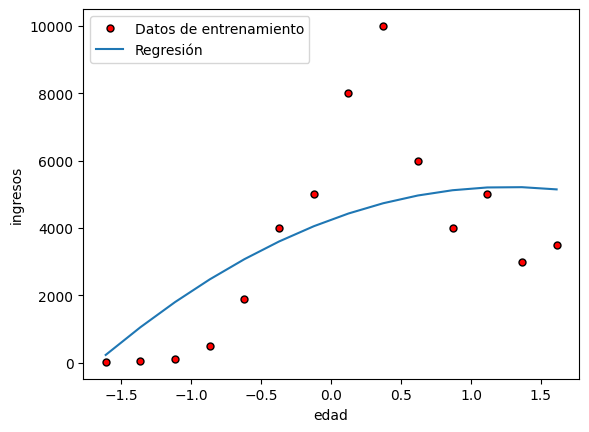

In [9]:
X_copia_array = X_copia.to_numpy()
pyplot.plot(X[:, 1], Y, 'ro', ms=5, mec='k')
pyplot.xlabel('edad')
pyplot.ylabel('ingresos')
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión'])


# Ecuacion de la Normal

In [10]:
# Cargar datos
data = np.loadtxt(os.path.join('../Datasets/', 'ejemplo2.csv'), delimiter=',',skiprows=1)
X = data[:, :1]
y = data[:, 1]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [11]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

    return theta


In [12]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(
    str(theta)))

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios
edad=30
X_array = [1,edad]
price = np.dot(X_array, theta)

print('Ingresos de una persona de 50 anios de edad (usando la acuacion de la normal)${:.0f}'.format(price))


Theta calculado a partir de la ecuación de la normal: [552.41758242  82.54505495]
Ingresos de una persona de 50 anios de edad (usando la acuacion de la normal)$3029
